In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

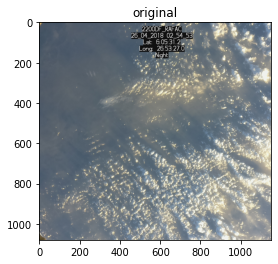

In [26]:
img = cv.imread('./images/train8.jpg')
img = img[:, 350:1500]

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('original')
plt.show()

In [30]:
def is_day(img, size_percentage=30, min_threshold=70):
    '''
    Function that return true if in the center size percentage of the photo
    (converted to gray color scale) the average color value is more bright 
    than min_threshold (so, more simply, if it's day).
    '''

    # Get image size
    height, width, _ = img.shape

    # Calculate center coordinate
    centerX = (width // 2 )
    centerY = (height // 2)

    # Calculate RightBorder 
    XRB = centerX + ((width * size_percentage) // 200)                    
    # Calculate LeftBorder
    XLB = centerX - ((width * size_percentage) // 200)
    # Calculate TopBorder
    YTB = centerY + ((height * size_percentage) // 200)
    # Calculate BottomBorder
    YBB = centerY - ((height * size_percentage) // 200)

    bgr_list = []

    # Creation of a list of BGR values for every pixel
    for x in range(XLB,XRB):
        for y in range(YBB,YTB):
            bgr_list.append(img[y,x]) # Append the BGR value to the list

    # Convert bgr_list in a numpy array
    numpy_bgr_array = np.array(bgr_list)
    # Calculate the average value of blue, green and red
    average_value = np.average(numpy_bgr_array,axis=0)

    # Convert the type of datas
    average_value = average_value.astype(int)

    # Map values in uint8 format type
    average_value = np.uint8([[[average_value[0],average_value[1],average_value[2]]]]) 

    # Convert the color from BGR to Grayscale
    gray_avg_value = cv.cvtColor(average_value, cv.COLOR_BGR2GRAY)
    #remove single-dimensional entries from the shape of the numpy array
    gray_avg_value = np.squeeze(gray_avg_value)

    # Return True if the gray_avg value
    return gray_avg_value >= min_threshold

In [31]:
day = is_day(img)

In [32]:
print(day)

True
